In [8]:
# Install the required packages
!pip install tqdm matplotlib-venn wordcloud seaborn
!pip install pydantic-settings
!pip uninstall pandas-profiling -y
!pip install ydata-profiling

# Import the necessary libraries
from tqdm import tqdm
import numpy as np
import pandas as pd
import itertools
import random
import os
import gc

import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from matplotlib_venn import venn2
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")
from wordcloud import WordCloud
import ydata_profiling as pdp  # Use ydata-profiling

# Load the dataset
df = pd.read_csv("/content/matches.csv")


In [9]:
pdp.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
df.head(10)

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan
5,335987,2007/08,Jaipur,2008-04-21,League,SR Watson,Sawai Mansingh Stadium,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,bat,Rajasthan Royals,wickets,6.0,167.0,20.0,N,NaN,Aleem Dar,RB Tiffin
6,335988,2007/08,Hyderabad,2008-04-22,League,V Sehwag,"Rajiv Gandhi International Stadium, Uppal",Deccan Chargers,Delhi Daredevils,Deccan Chargers,bat,Delhi Daredevils,wickets,9.0,143.0,20.0,N,NaN,IL Howell,AM Saheba
7,335989,2007/08,Chennai,2008-04-23,League,ML Hayden,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,Chennai Super Kings,runs,6.0,209.0,20.0,N,NaN,DJ Harper,GA Pratapkumar
8,335990,2007/08,Hyderabad,2008-04-24,League,YK Pathan,"Rajiv Gandhi International Stadium, Uppal",Deccan Chargers,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,3.0,215.0,20.0,N,NaN,Asad Rauf,MR Benson
9,335991,2007/08,Chandigarh,2008-04-25,League,KC Sangakkara,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,Kings XI Punjab,runs,66.0,183.0,20.0,N,NaN,Aleem Dar,AM Saheba


In [11]:
df.shape

(1095, 20)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [13]:
df.isnull().sum()

,0
id,0
season,0
city,51
date,0
match_type,0
player_of_match,5
venue,0
team1,0
team2,0
toss_winner,0


In [14]:
df.result.value_counts()

,count
result,
wickets,578
runs,498
tie,14
no result,5


['2007/08' '2009' '2009/10' '2011' '2012' '2013' '2014' '2015' '2016'
 '2017' '2018' '2019' '2020/21' '2021' '2022' '2023' '2024']


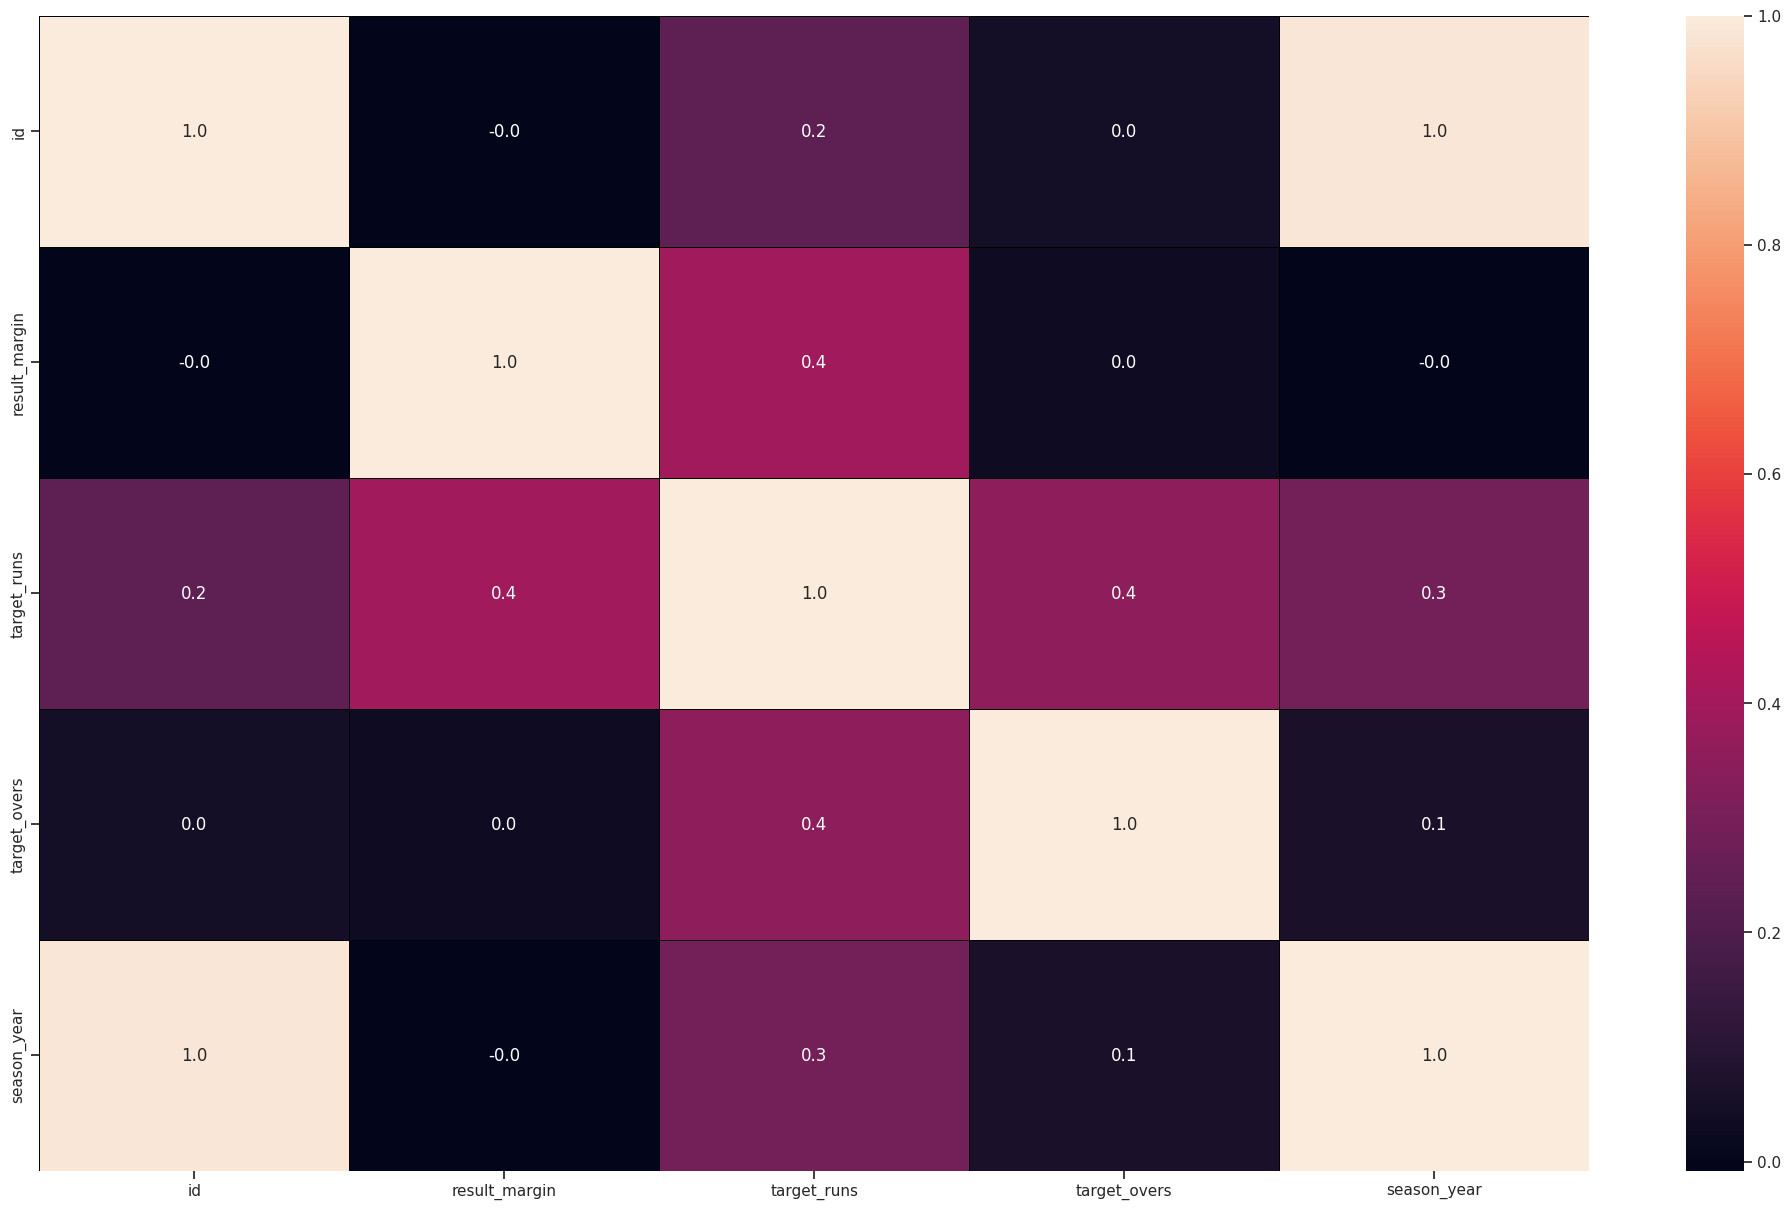

In [18]:
# Check the unique values in the 'season' column to ensure they are years
print(df['season'].unique())

# Convert the 'season' column to datetime objects, assuming it contains only year values
df['season'] = pd.to_datetime(df['season'], format='%Y', errors='coerce')

# Extract the year from the datetime object
df['season_year'] = df['season'].dt.year

# Drop the original 'season' column
df = df.drop('season', axis=1)

# Ensure all columns for correlation are numeric
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Now calculate the correlation matrix and plot the heatmap
f, ax = plt.subplots(figsize=(25, 15))
sns.heatmap(df[numeric_cols].corr(), annot=True, linewidths=0.5, linecolor="black", fmt='.1f', ax=ax)
plt.show()


In [19]:
most_toss_wins_df = df['toss_winner'].value_counts()[:-1]
most_toss_wins_df = pd.DataFrame(most_toss_wins_df)
most_toss_wins_df

,count
toss_winner,
Mumbai Indians,143
Kolkata Knight Riders,122
Chennai Super Kings,122
Rajasthan Royals,120
Royal Challengers Bangalore,113
Sunrisers Hyderabad,88
Kings XI Punjab,85
Delhi Daredevils,80
Delhi Capitals,50


from matplotlib import pyplot as plt
_df_0['count'].plot(kind='hist', bins=20, title='count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['count'].plot(kind='line', figsize=(8, 4), title='count')
plt.gca().spines[['top', 'right']].set_visible(False)

In [20]:
most_wins_df = df['winner'].value_counts()[:-1]
most_wins_df = pd.DataFrame(most_wins_df)
most_wins_df

,count
winner,
Mumbai Indians,144
Chennai Super Kings,138
Kolkata Knight Riders,131
Royal Challengers Bangalore,116
Rajasthan Royals,112
Kings XI Punjab,88
Sunrisers Hyderabad,88
Delhi Daredevils,67
Delhi Capitals,48


from matplotlib import pyplot as plt
most_wins_df['count'].plot(kind='hist', bins=20, title='count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
most_wins_df['count'].plot(kind='line', figsize=(8, 4), title='count')
plt.gca().spines[['top', 'right']].set_visible(False)

Text(0.5, 1.0, 'Matches won by the Teams')

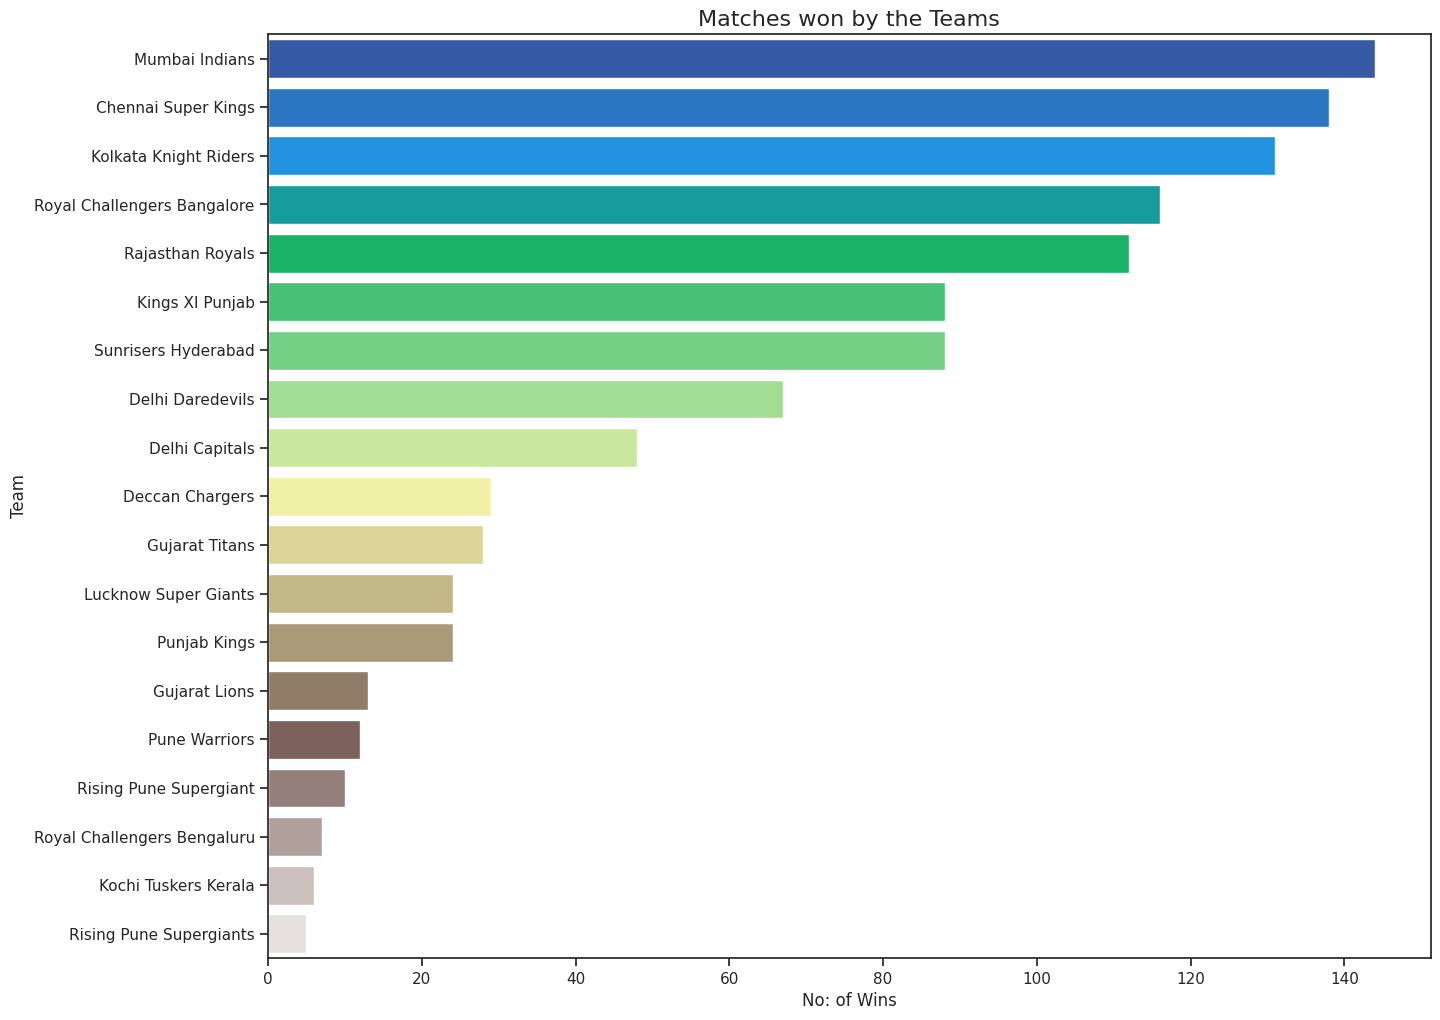

In [21]:
plt.figure(figsize = (15,12))
sns.countplot(y = 'winner',
              data = df,
              order= df['winner'].value_counts().index,
              palette = 'terrain' )
plt.xlabel('No: of Wins',fontsize=12)
plt.ylabel('Team',fontsize=12)
plt.title('Matches won by the Teams',fontsize=16)

In [23]:
most_mom_df = pd.DataFrame(data = df["player_of_match"].value_counts().iloc[:15])
most_mom_df = most_mom_df
most_mom_df

,count
player_of_match,
AB de Villiers,25
CH Gayle,22
RG Sharma,19
DA Warner,18
V Kohli,18
MS Dhoni,17
SR Watson,16
YK Pathan,16
RA Jadeja,16


from matplotlib import pyplot as plt
_df_2['count'].plot(kind='hist', bins=20, title='count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['count'].plot(kind='line', figsize=(8, 4), title='count')
plt.gca().spines[['top', 'right']].set_visible(False)

Text(0.5, 1.0, 'Most man of Match')

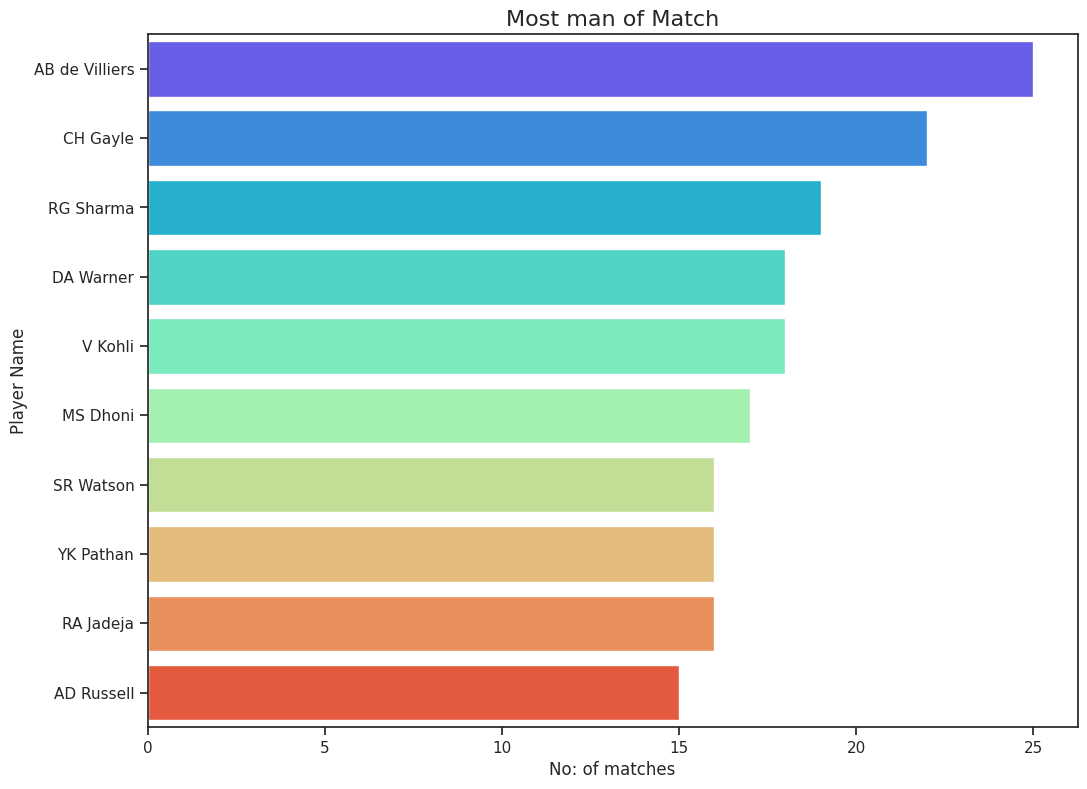

In [24]:
plt.figure(figsize = (12,9))
sns.countplot(y = 'player_of_match',
              data = df,
              order = df['player_of_match'].value_counts().iloc[:10].index,
              palette='rainbow')
plt.xlabel('No: of matches',fontsize=12)
plt.ylabel('Player Name',fontsize=12)
plt.title('Most man of Match',fontsize=16)

Text(0.5, 1.0, 'Number of matches played in each Stadium')

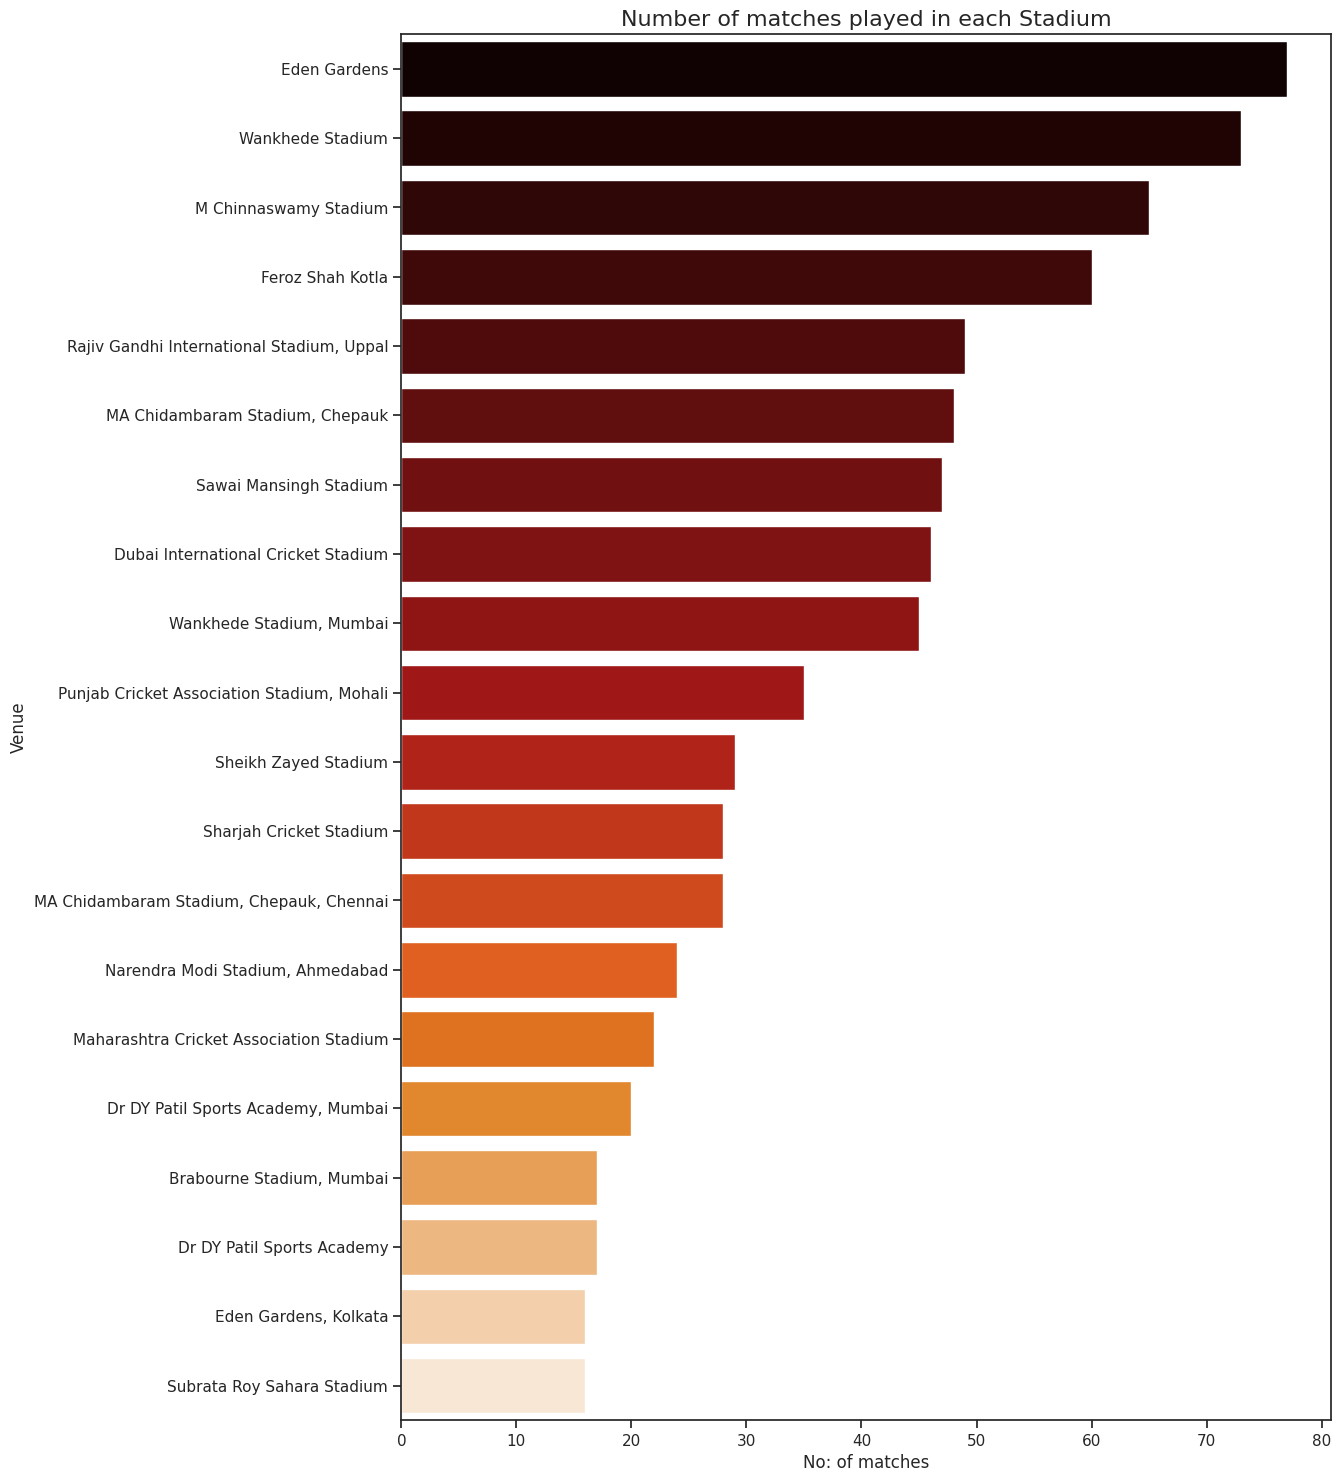

In [25]:
plt.figure(figsize = (12,18))
sns.countplot(y = 'venue',
              data = df,
              order = df['venue'].value_counts().iloc[:20].index,
              palette='gist_heat')
plt.xlabel('No: of matches',fontsize=12)
plt.ylabel('Venue',fontsize=12)
plt.title('Number of matches played in each Stadium',fontsize=16)

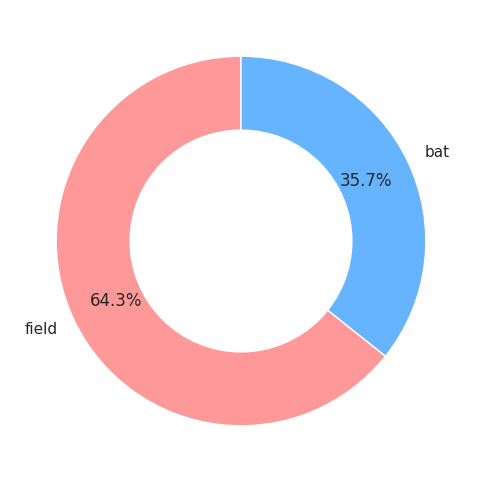

In [26]:
plt.figure(figsize=(6,6))
sizes = df.toss_decision.value_counts()
labels = df.toss_decision.value_counts().index
plt.pie(sizes,colors = ['#ff9999','#66b3ff'],
         labels=labels,
         autopct='%1.1f%%',
         startangle=90,
         pctdistance=0.75,
         )

#draw white circle
centre_circle = plt.Circle((0,0),0.60,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

Text(0.5, 1.0, 'Decision to field or bat in each venue')

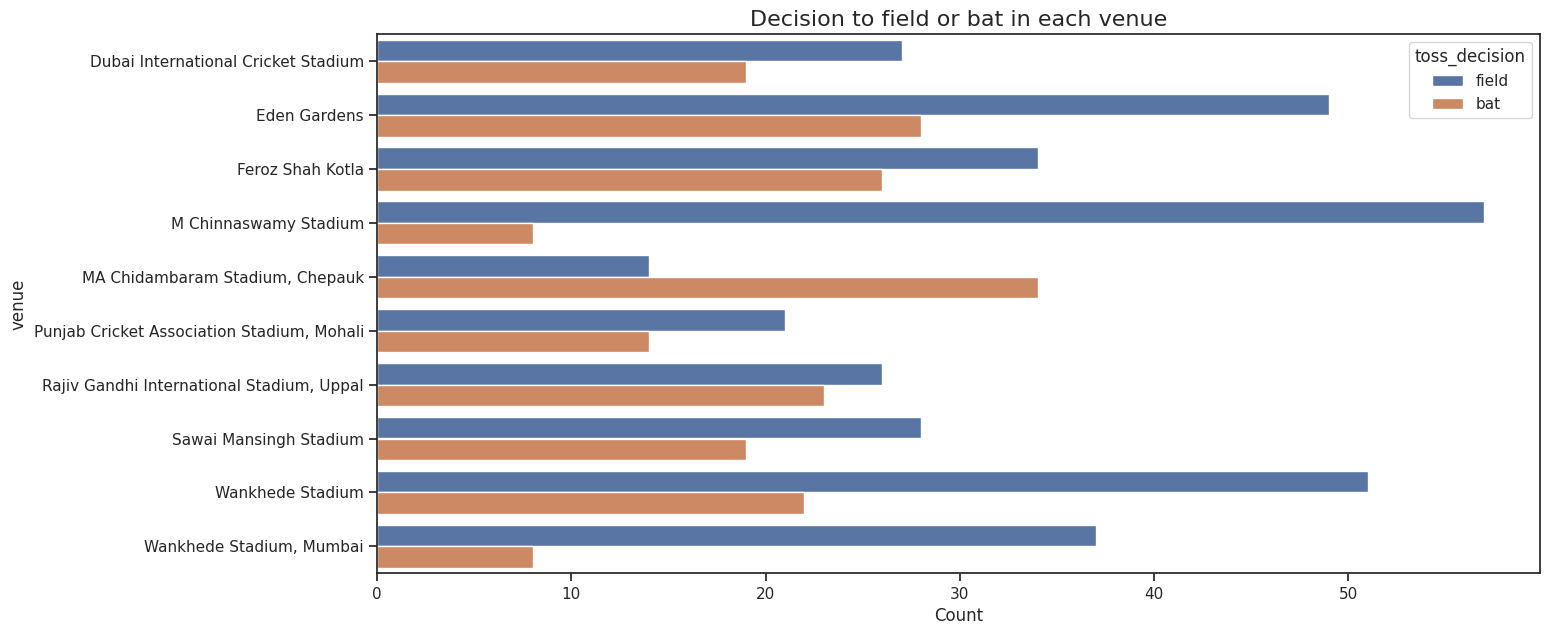

In [27]:
plt.figure(figsize=(15,7))
sns.countplot(y='venue',
              hue='toss_decision',
              data=df,
              order = df['venue'].value_counts().iloc[:10].index.sort_values(),
              palette='deep')
plt.ylabel('venue',fontsize=12)
plt.xlabel('Count',fontsize=12)
plt.title('Decision to field or bat in each venue', fontsize=16)

Text(0.5, 1.0, 'Number of matches played in each City')

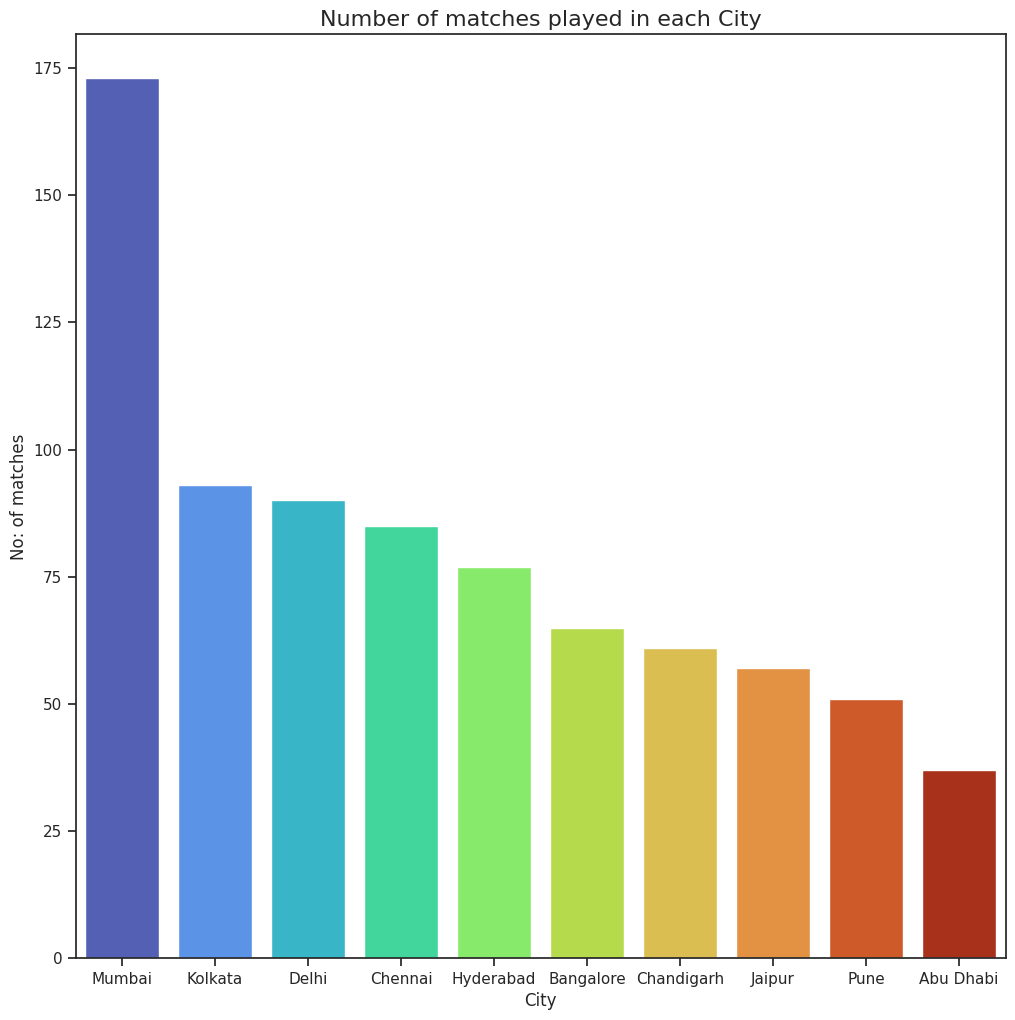

In [28]:
plt.figure(figsize = (12,12))
sns.countplot(x = 'city',
              data = df,
              order = df['city'].value_counts().iloc[:10].index,
              palette='turbo')
plt.ylabel('No: of matches',fontsize=12)
plt.xlabel('City',fontsize=12)
plt.title('Number of matches played in each City',fontsize=16)

Text(0.5, 1.0, 'Most Match as Umpire1')

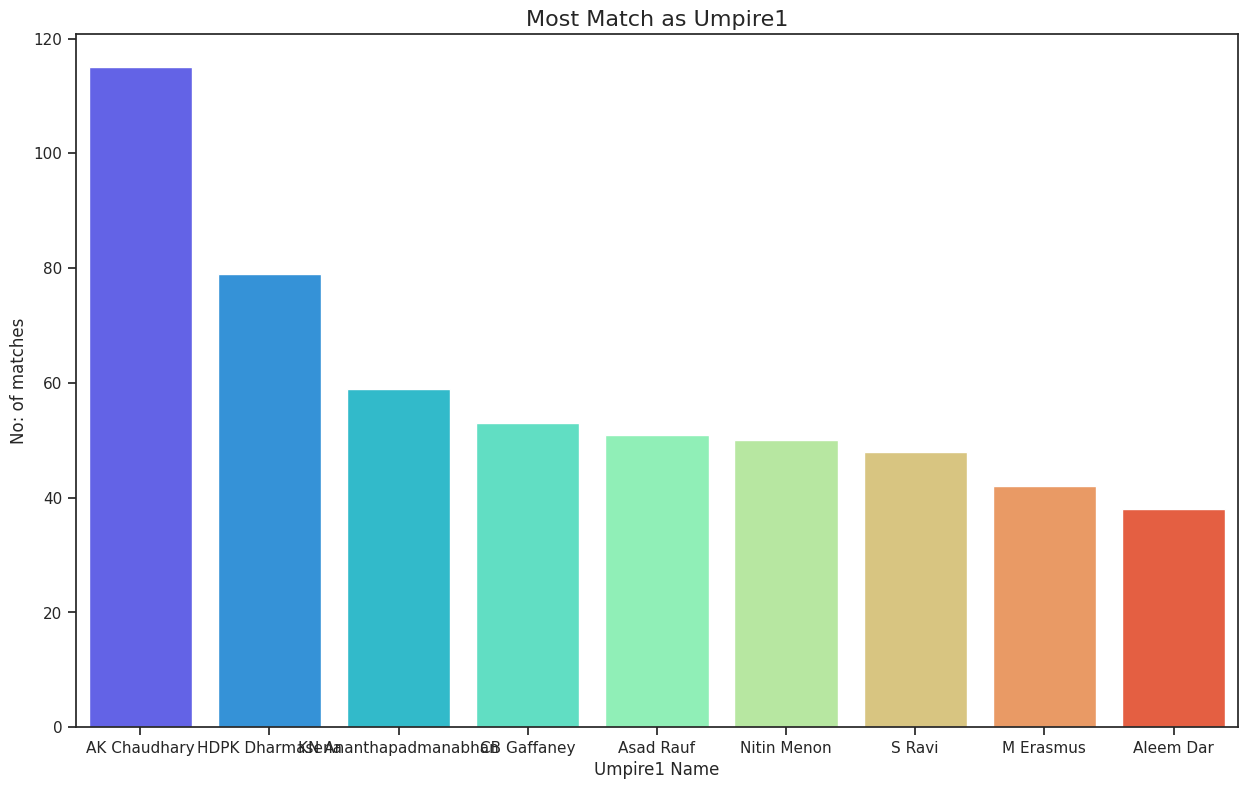

In [29]:
plt.figure(figsize = (15,9))
sns.countplot(x = 'umpire1',
              data = df,
              order = df['umpire1'].value_counts().iloc[:9].index,
              palette='rainbow')
plt.ylabel('No: of matches',fontsize=12)
plt.xlabel('Umpire1 Name',fontsize=12)
plt.title('Most Match as Umpire1',fontsize=16)

Text(0.5, 1.0, 'Most Match as Umpire1')

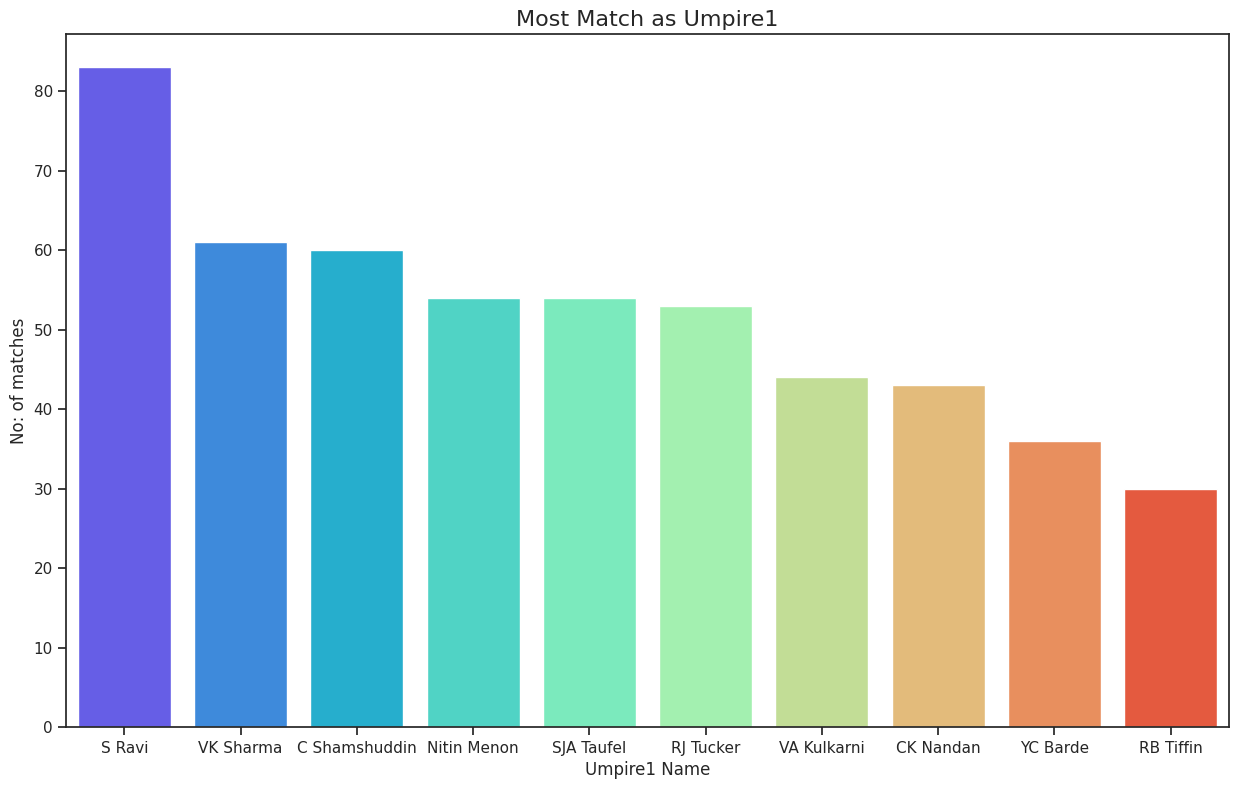

In [30]:
plt.figure(figsize = (15,9))
sns.countplot(x = 'umpire2',
              data = df,
              order = df['umpire2'].value_counts().iloc[:10].index,
              palette='rainbow')
plt.ylabel('No: of matches',fontsize=12)
plt.xlabel('Umpire1 Name',fontsize=12)
plt.title('Most Match as Umpire1',fontsize=16)

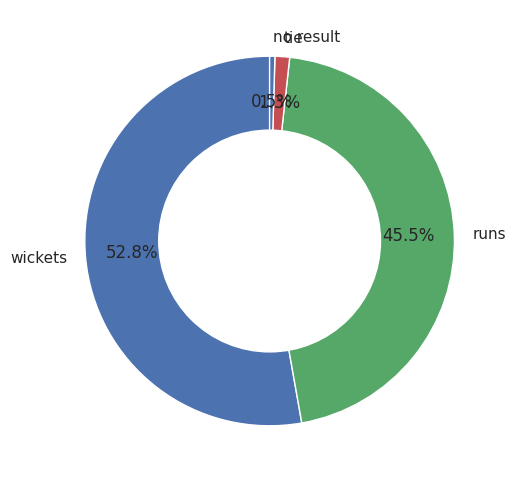

In [31]:
plt.figure(figsize=(6,6))
sizes = df.result.value_counts()
labels = df.result.value_counts().index
plt.pie(sizes,colors = ['b','g','r'],
         labels=labels,
         autopct='%1.1f%%',
         startangle=90,
         pctdistance=0.75,
         )

#draw white circle
centre_circle = plt.Circle((0,0),0.60,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

In [32]:
toss_factor = df.toss_winner == df.winner
toss_factor.value_counts()

,count
True,554
False,541


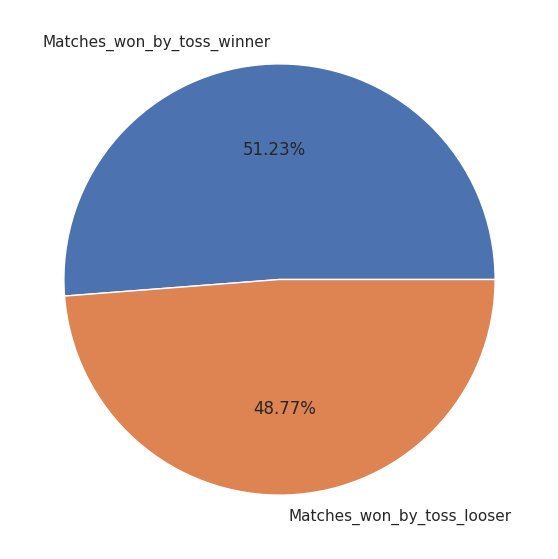

In [33]:
toss_data = { "Matches_won_by_toss_winner" : 418,
              "Matches_won_by_toss_looser" : 398}
toss_data = pd.Series(toss_data)
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(7,7))
plt.pie(x=toss_data,autopct="%.2f%%",labels=toss_data.index);

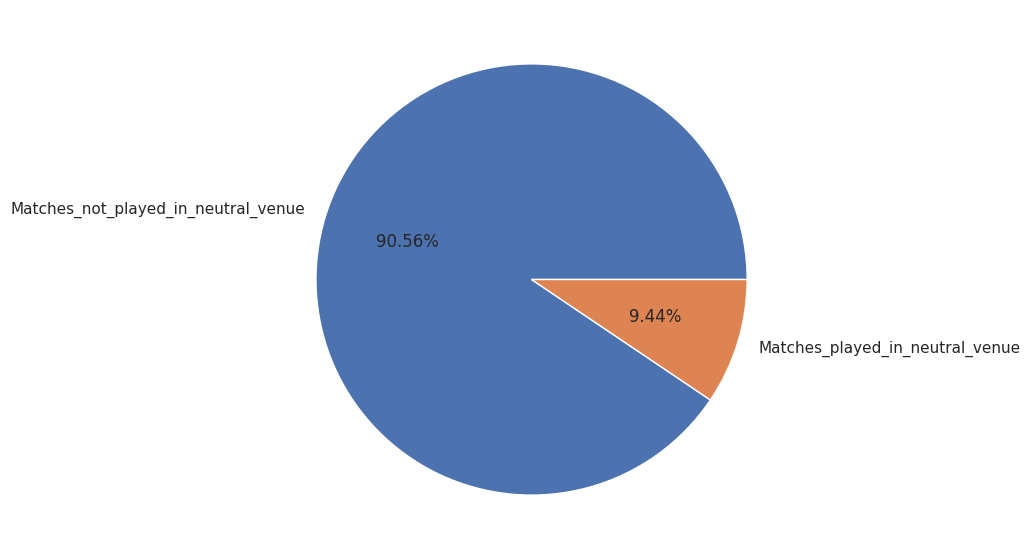

In [34]:
venue_data = { "Matches_not_played_in_neutral_venue" : 739,
              "Matches_played_in_neutral_venue" : 77}
venue_data = pd.Series(venue_data)
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(7,7))
plt.pie(x=venue_data,autopct="%.2f%%",labels=venue_data.index);

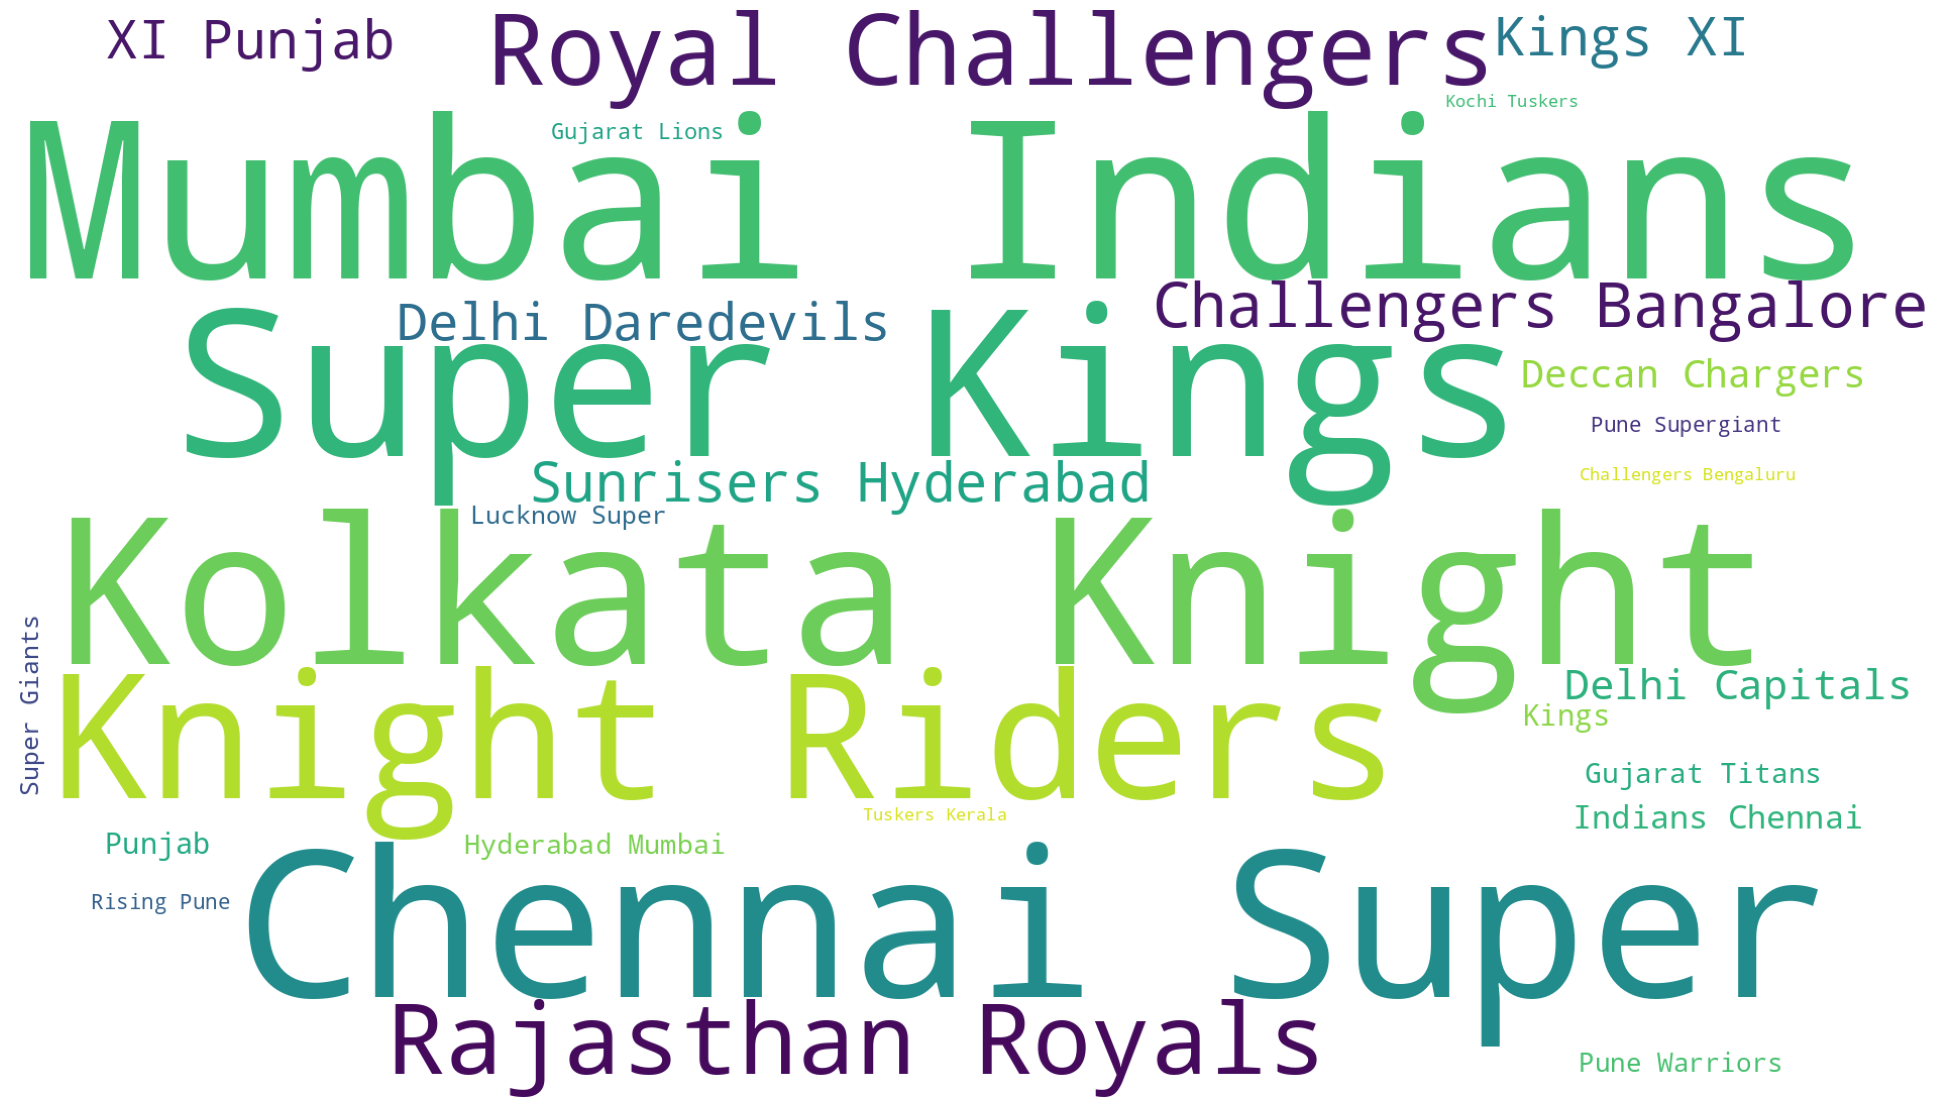

In [35]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.toss_winner))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('Rating.png')
plt.show()